In [ ]:
# Librerias


In [1]:
import csv # CSV parser
import json  # json parser
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import matplotlib.mlab as mlab
from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import figure, show
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [ ]:
# Creando el Dataframe para trabajar


In [5]:
dataframe = pd.read_csv('droop_filenames.csv')
pd.set_option('display.max_columns', 500)


In [ ]:
# Descripcion del dataframe


In [6]:
dataframe.describe()


drop          x0          y0          x1          y1          x2  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.619529  108.215488  221.912458  110.195286  258.202020  114.713805   
std      0.486322   52.728980   73.485835   51.517600   82.780846   49.849391   
min      0.000000  -26.000000   74.000000  -17.000000  105.000000   -9.000000   
25%      0.000000   69.000000  168.000000   72.000000  195.000000   79.000000   
50%      1.000000  111.000000  199.000000  113.000000  226.000000  118.000000   
75%      1.000000  140.000000  281.000000  140.000000  328.000000  143.000000   
max      1.000000  407.000000  506.000000  406.000000  546.000000  405.000000   

               y2          x3          y3          x4          y4          x5  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean   293.747475  121.107744  329.178451  133.050505  362.531987  153.104377   
std     92.545717   48.287237  102.950519   45.350521  112.763444   40.982188   
min    123.000000   -5.000000  141.000000    7.000000  157.000000   38.000000   
25%    220.000000   88.000000  246.000000  103.000000  272.000000  128.000000   
50%    256.000000  123.000000  291.000000  131.000000  318.000000  152.000000   
75%    374.000000  148.000000  423.000000  159.000000  466.000000  174.000000   
max    610.000000  405.000000  674.000000  406.000000  735.000000  408.000000   

               y5          x6          y6          x7          y7          x8  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean   391.858586  180.215488  415.518519  211.589226  433.612795  247.471380   
std    121.500752   36.508431  128.431601   34.239414  134.014653   34.964848   
min    172.000000   81.000000  184.000000  100.000000  193.000000  118.000000   
25%    293.000000  159.000000  310.000000  192.000000  325.000000  227.000000   
50%    344.000000  178.000000  361.000000  209.000000  377.000000  247.000000   
75%    501.000000  197.000000  532.000000  228.000000  554.000000  267.000000   
max    788.000000  412.000000  835.000000  417.000000  876.000000  423.000000   

               y8          x9          y9         x10         y10         x11  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean   439.326599  283.383838  433.811448  314.680135  415.784512  341.683502   
std    135.601031   38.586173  132.880350   43.491480  126.177859   49.120998   
min    197.000000  135.000000  196.000000  151.000000  188.000000  164.000000   
25%    332.000000  260.000000  327.000000  284.000000  315.000000  304.000000   
50%    379.000000  285.000000  378.000000  317.000000  363.000000  346.000000   
75%    557.000000  309.000000  550.000000  347.000000  525.000000  381.000000   
max    893.000000  431.000000  889.000000  439.000000  857.000000  452.000000   

              y11         x12         y12         x13         y13         x14  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean   392.316498  361.717172  363.151515  373.727273  329.959596  380.094276   
std    118.239082   53.453953  108.988441   56.083038   98.813698   57.170187   
min    173.000000  174.000000  156.000000  179.000000  137.000000  180.000000   
25%    299.000000  319.000000  277.000000  329.000000  254.000000  332.000000   
50%    339.000000  367.000000  316.000000  376.000000  290.000000  381.000000   
75%    494.000000  404.000000  455.000000  421.000000  410.000000  428.000000   
max    810.000000  482.000000  755.000000  496.000000  693.000000  509.000000   

              y14         x15         y15         x16         y16         x17  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean   294.656566  384.441077  259.195286  386.393939  222.919192  132.865320   
std     88.565615   58.092634   79.053879   58.475131   70.348507   47.036739   
min    119.000000  180.000000  101.0000

In [ ]:
# Dataframe


In [7]:
dataframe


drop                        filename   x0   y0   x1   y1   x2   y2   x3  \
0       0  keypoints/nodroop/nodroop1.jpg  182  180  187  199  192  217  199   
1       0  keypoints/nodroop/nodroop2.jpg  245  137  247  150  251  164  256   
2       0  keypoints/nodroop/nodroop3.jpg  111  192  114  220  120  246  125   
3       0  keypoints/nodroop/nodroop4.jpg  126  212  127  238  131  265  136   
4       0  keypoints/nodroop/nodroop5.jpg  131  204  129  227  132  252  135   
..    ...                             ...  ...  ...  ...  ...  ...  ...  ...   
292     1    keypoints/droop/droop186.jpg   44  332   54  386   65  437   80   
293     1    keypoints/droop/droop187.jpg   95   76   91  113   92  149   95   
294     1    keypoints/droop/droop188.jpg   85  323   90  375   98  425  105   
295     1    keypoints/droop/droop189.jpg  149  154  152  183  156  211  161   
296     1    keypoints/droop/droop190.jpg   24  338   30  393   41  444   52   

      y3   x4   y4   x5   y5   x6   y6   x7   y7   x8   y8   x9   y9  x10  \
0    235  206  252  215  268  227  281  244  290  265  290  284  285  299   
1    177  261  189  269  200  279  210  291  217  305  217  319  213  329   
2    272  132  299  144  324  162  344  184  360  213  366  243  362  267   
3    292  141  320  154  344  172  364  194  377  225  379  256  378  284   
4    278  142  303  154  327  171  348  194  361  221  366  249  363  274   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
292  487  102  532  138  570  182  596  227  616  271  623  312  614  351   
293  184  102  220  118  251  146  270  180  280  220  282  261  285  301   
294  474  120  520  144  558  181  584  225  600  272  600  318  592  360   
295  238  170  263  188  285  210  305  232  323  258  329  284  325  304   
296  496   72  544  105  581  152  605  205  621  260  625  315  618  366   

     y10  x11  y11  x12  y12  x13  y13  x14  y14  x15  y15  x16  y16  x17  \
0    273  310  258  318  239  321  220  322  198  323  177  323  155  185   
1    204  337  194  343  181  346  167  346  152  347  138  348  123  249   
2    347  285  327  298  303  306  279  312  253  318  228  322  201  125   
3    369  308  352  326  328  336  300  339  269  341  240  344  210  135   
4    354  297  338  313  317  324  291  328  264  331  237  332  209  141   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
292  592  387  565  413  529  428  483  437  438  444  392  450  343  103   
293  281  337  271  361  246  375  214  385  179  393  142  397  104  111   
294  569  394  540  415  500  426  455  432  407  436  359  436  311  111   
295  310  323  291  339  269  348  244  354  217  360  191  364  162  171   
296  600  410  574  440  533  455  480  462  424  467  368  468  311   71   

     y17  x18  y18  x19  y19  x20  y20  x21  y21  x22  y22  x23  y23  x24  \
0    165  195  153  210  148  226  149  240  154  253  150  267  141  283   
1    129  256  121  266  118  277  119  287  122  299  119  309  114  319   
2    169  138  153  159  148  180  151  200  159  235  160  255  152  276   
3    176  145  158  166  153  186  156  205  165  236  165  257  157  281   
4    176  154  163  173  159  192  161  211  165  231  167  251  164  272   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
292  279  131  258  165  245  204  242  240  252  308  256  343  252  379   
293   42  129   22  158   16  186   21  215   32  276   38  305   30  334   
294  299  133  275  168  265  204  268  238  280  282  278  313  265  346   
295  140  183  120  205  112  228  114  248  124  282  129  302  122  324   
296  279   94  255  128  245  166  245  200  257  278  248  312  229  351   

     y24  x25  y25  x26  y26  x27  y27  x28  y28  x29  y29  x30  y30  x31  \
0    136  299  137  310  147  248  162  250  175  252  188  254  202  239   
1    111  330  112  337  119  294  129  295  139  296  149  297  159  286   
2    151  297  159  309  177  218  182

In [ ]:
# Head


In [8]:
dataframe.head()


drop                        filename   x0   y0   x1   y1   x2   y2   x3  \
0     0  keypoints/nodroop/nodroop1.jpg  182  180  187  199  192  217  199   
1     0  keypoints/nodroop/nodroop2.jpg  245  137  247  150  251  164  256   
2     0  keypoints/nodroop/nodroop3.jpg  111  192  114  220  120  246  125   
3     0  keypoints/nodroop/nodroop4.jpg  126  212  127  238  131  265  136   
4     0  keypoints/nodroop/nodroop5.jpg  131  204  129  227  132  252  135   

    y3   x4   y4   x5   y5   x6   y6   x7   y7   x8   y8   x9   y9  x10  y10  \
0  235  206  252  215  268  227  281  244  290  265  290  284  285  299  273   
1  177  261  189  269  200  279  210  291  217  305  217  319  213  329  204   
2  272  132  299  144  324  162  344  184  360  213  366  243  362  267  347   
3  292  141  320  154  344  172  364  194  377  225  379  256  378  284  369   
4  278  142  303  154  327  171  348  194  361  221  366  249  363  274  354   

   x11  y11  x12  y12  x13  y13  x14  y14  x15  y15  x16  y16  x17  y17  x18  \
0  310  258  318  239  321  220  322  198  323  177  323  155  185  165  195   
1  337  194  343  181  346  167  346  152  347  138  348  123  249  129  256   
2  285  327  298  303  306  279  312  253  318  228  322  201  125  169  138   
3  308  352  326  328  336  300  339  269  341  240  344  210  135  176  145   
4  297  338  313  317  324  291  328  264  331  237  332  209  141  176  154   

   y18  x19  y19  x20  y20  x21  y21  x22  y22  x23  y23  x24  y24  x25  y25  \
0  153  210  148  226  149  240  154  253  150  267  141  283  136  299  137   
1  121  266  118  277  119  287  122  299  119  309  114  319  111  330  112   
2  153  159  148  180  151  200  159  235  160  255  152  276  151  297  159   
3  158  166  153  186  156  205  165  236  165  257  157  281  156  303  164   
4  163  173  159  192  161  211  165  231  167  251  164  272  165  290  171   

   x26  y26  x27  y27  x28  y28  x29  y29  x30  y30  x31  y31  x32  y32  x33  \
0  310  147  248  162  250  175  252  188  254  202  239  213  248  215  256   
1  337  119  294  129  295  139  296  149  297  159  286  165  292  167  299   
2  309  177  218  182  218  201  217  220  216  239  191  250  203  254  215   
3  317  184  221  185  219  203  217  220  215  239  196  259  207  263  218   
4  305  182  221  185  219  204  218  222  217  241  196  258  207  262  218   

   y33  x34  y34  x35  y35  x36  y36  x37  y37  x38  y38  x39  y39  x40  y40  \
0  217  265  213  273  209  203  173  211  167  220  165  230  170  221  172   
1  168  305  165  310  162  261  135  267  131  274  131  280  134  274  135   
2  259  227  256  239  253  148  186  160  180  173  181  187  188  173  190   
3  266  230  264  242  261  156  194  167  188  180  188  193  195  180  198   
4  265  230  262  242  259  159  190  170  184  182  184  193  192  182  193   

   x41  y41  x42  y42  x43  y43  x44  y44  x45  y45  x46  y46  x47  y47  x48  \
0  211  174  268  164  277  157  287  156  295  159  288  162  278  164  227   
1  268  136  309  130  315  126  321  125  327  128  322  129  316  130  277   
2  160  190  246  191  260  186  273  186  285  193  273  196  260  194  163   
3  167  198  252  198  265  191  279  193  292  199  280  203  265  202  175   
4  169  193  252  194  264  189  276  190  287  196  276  197  263  196  179   

   y48  x49  y49  x50  y50  x51  y51  x52  y52  x53  y53  x54  y54  x55  y55  \
0  237  238  233  250  229  258  230  266  227  280  228  293  228  281  240   
1  182  285  179  293  177  300  178  307  176  316  176  326  176  317  184   
2  282  182  274  201  271  215  274  230  272  249  277  265  289  248  305   
3  300  190  290  206  285  217  289  229  286  246  293  265  304  245  310   
4  292  196  288  209  286  220  288  231  286  247  289  267  295  247  300   

   x56  y56  x57  y57  x58  y58  x59  y59  x60  y60  x61  y61  x62  y62  x63  \
0  270  246  260  248  252  249  239  246  231  238  251  237  259  237  267   
1  309 

In [ ]:
# Heatmap nulls


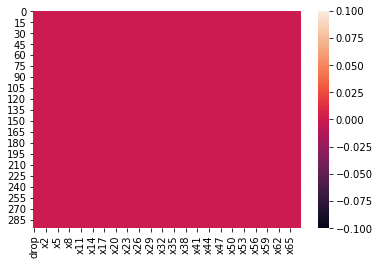

In [9]:
sn.heatmap(dataframe.isnull())


In [ ]:
# Preparacion del dataframe


In [10]:
df_x = dataframe[['x37', 'y37', 'x38', 'y38', 'x39', 'y39', 'x40', 'y40', 'x41', 'y41', 'x42', 'y42', 'x43', 'y43', 'x44', 'y44', 'x45', 'y45', 'x46', 'y46', 'x47', 'y47', 'x48', 'y48', 'x49', 'y49', 'x50', 'y50', 'x51', 'y51', 'x52', 'y52', 'x53', 'y53', 'x54', 'y54', 'x55', 'y55', 'x56', 'y56', 'x57', 'y57', 'x58', 'y58', 'x59', 'y59', 'x60', 'y60', 'x61', 'y61', 'x62', 'y62', 'x63', 'y63', 'x64', 'y64', 'x65', 'y65', 'x66', 'y66', 'x67', 'y67']]
df_y = dataframe['drop']


In [ ]:
# x


In [11]:
df_x


x37  y37  x38  y38  x39  y39  x40  y40  x41  y41  x42  y42  x43  y43  \
0    211  167  220  165  230  170  221  172  211  174  268  164  277  157   
1    267  131  274  131  280  134  274  135  268  136  309  130  315  126   
2    160  180  173  181  187  188  173  190  160  190  246  191  260  186   
3    167  188  180  188  193  195  180  198  167  198  252  198  265  191   
4    170  184  182  184  193  192  182  193  169  193  252  194  264  189   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
292  174  301  200  300  220  312  199  317  174  318  320  320  341  310   
293  159   65  178   66  198   77  176   79  157   78  286   84  307   75   
294  172  303  196  302  217  318  195  324  171  325  308  316  328  300   
295  210  148  224  148  236  155  223  157  210  157  291  158  303  150   
296  138  294  166  293  189  315  166  321  139  323  296  309  319  285   

     x44  y44  x45  y45  x46  y46  x47  y47  x48  y48  x49  y49  x50  y50  \
0    287  156  295  159  288  162  278  164  227  237  238  233  250  229   
1    321  125  327  128  322  129  316  130  277  182  285  179  293  177   
2    273  186  285  193  273  196  260  194  163  282  182  274  201  271   
3    279  193  292  199  280  203  265  202  175  300  190  290  206  285   
4    276  190  287  196  276  197  263  196  179  292  196  288  209  286   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
292  364  314  384  328  364  331  340  327  210  484  234  451  262  435   
293  328   77  347   87  327   91  306   89  162  212  187  212  209  211   
294  351  299  370  309  354  320  330  321  198  512  222  492  245  481   
295  317  151  328  158  317  161  303  160  209  240  226  235  246  235   
296  347  283  369  301  350  312  322  314  173  504  203  489  228  483   

     x51  y51  x52  y52  x53  y53  x54  y54  x55  y55  x56  y56  x57  y57  \
0    258  230  266  227  280  228  293  228  281  240  270  246  260  248   
1    300  178  307  176  316  176  326  176  317  184  309  189  301  190   
2    215  274  230  272  249  277  265  289  248  305  230  313  214  314   
3    217  289  229  286  246  293  265  304  245  310  230  313  217  313   
4    220  288  231  286  247  289  267  295  247  300  232  303  220  304   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
292  277  441  293  438  314  457  327  491  312  521  291  531  274  532   
293  225  218  241  215  265  223  289  234  262  242  237  242  220  240   
294  265  486  284  480  306  489  328  507  307  514  286  515  267  517   
295  259  239  272  237  290  240  306  248  288  265  270  272  255  274   
296  248  486  269  483  297  489  330  503  298  506  271  507  249  508   

     x58  y58  x59  y59  x60  y60  x61  y61  x62  y62  x63  y63  x64  y64  \
0    252  249  239  246  231  238  251  237  259  237  267  235  288  230   
1    294  190  286  188  280  183  293  182  300  182  307  181  322  177   
2    199  312  180  302  170  284  200  281  215  282  230  282  258  289   
3    205  312  190  308  181  300  205  298  217  299  229  299  257  303   
4    209  303  196  299  186  293  209  294  220  295  231  294  260  295   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
292  256  529  231  515  221  482  261  453  276  454  292  455  317  488   
293  202  236  182  229  170  214  207  220  224  226  241  226  282  233   
294  246  517  222  519  208  508  246  494  266  496  285  493  317  505   
295  241  271  223  261  215  241  245  242  259  245  272  245  299  248   
296  229  507  204  506  184  502  229  495  248  498  270  496  318  501   

     x65  y65  x66  y66  x67  y67  
0    268  236  259  238  251  238  
1    308  181  301  183  294  183  
2    230  297  214  297  200  295  
3    229  299  217  300  205  299  
4    231  292  220  293  209  291  
..   ...  ...  ...  ...  ...  ...  
292  291  508  275  509  258  507  
293  239  226  22

In [ ]:
# y


In [12]:
df_y


0      0
1      0
2      0
3      0
4      0
      ..
292    1
293    1
294    1
295    1
296    1
Name: drop, Length: 297, dtype: int64

In [ ]:
# Dataframe de entrenamiento y de prueba


In [13]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=42)


In [14]:
x_train

x37  y37  x38  y38  x39  y39  x40  y40  x41  y41  x42  y42  x43  y43  \
266  205  123  216  120  226  127  217  130  207  133  271  120  279  110   
37   191  162  204  162  217  167  203  169  191  169  271  167  283  161   
16   163  183  176  183  188  190  175  191  162  191  245  192  257  187   
253  159  245  178  246  196  263  178  264  157  263  274  267  292  252   
144  192  160  205  158  217  165  205  168  192  170  274  161  284  152   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
188  142  268  170  267  198  284  171  290  142  292  306  272  329  252   
71   194  181  208  181  219  192  207  195  192  195  272  192  284  182   
106  172  142  184  142  195  150  182  151  171  151  243  152  257  145   
270  166  306  187  305  206  320  187  324  166  324  298  316  315  299   
102  152  126  163  126  173  133  162  134  151  133  215  136  226  130   

     x44  y44  x45  y45  x46  y46  x47  y47  x48  y48  x49  y49  x50  y50  \
266  290  109  298  116  291  119  281  120  233  210  242  196  252  187   
37   296  161  307  166  296  169  283  169  202  256  216  245  232  239   
16   270  189  280  194  269  196  257  195  171  290  187  281  204  276   
253  313  254  330  268  314  271  293  270  161  392  183  386  205  386   
144  297  151  308  158  298  162  285  163  214  264  226  252  240  244   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
188  357  248  382  260  361  271  333  273  164  456  200  452  236  446   
71   298  181  310  188  299  194  285  195  211  295  222  289  232  286   
106  269  145  282  150  269  154  256  154  175  235  186  235  196  234   
270  337  298  357  310  340  317  318  318  201  481  224  467  245  461   
102  237  131  247  136  237  139  225  138  149  209  160  206  170  205   

     x51  y51  x52  y52  x53  y53  x54  y54  x55  y55  x56  y56  x57  y57  \
266  261  188  268  184  280  188  291  198  283  199  273  201  265  203   
37   243  242  254  240  269  246  285  256  268  265  253  269  241  270   
16   216  278  228  276  244  280  259  288  244  297  230  302  216  303   
253  220  393  237  393  263  402  291  415  259  423  231  424  213  422   
144  250  246  257  243  271  250  282  262  272  272  260  276  251  277   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
188  264  450  290  442  325  444  359  452  330  490  297  510  269  516   
71   241  289  250  286  262  290  276  295  263  305  251  310  241  311   
106  206  238  215  236  231  239  253  243  231  254  214  259  204  259   
270  261  464  277  460  298  466  321  480  298  489  279  492  262  494   
102  178  208  187  207  201  210  218  216  200  225  186  228  176  228   

     x58  y58  x59  y59  x60  y60  x61  y61  x62  y62  x63  y63  x64  y64  \
266  257  205  246  208  238  207  254  196  262  195  270  193  286  196   
37   230  269  216  266  209  256  231  251  243  252  253  251  278  256   
16   204  303  188  300  178  291  204  288  216  288  228  287  253  288   
253  196  417  178  406  169  392  203  397  220  403  237  405  281  413   
144  241  276  228  273  222  262  241  258  250  258  258  257  276  261   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
188  239  514  202  495  179  461  237  466  265  468  292  463  347  457   
71   232  310  222  306  217  295  232  296  241  297  250  296  269  295   
106  194  256  185  249  181  237  196  242  205  244  215  244  246  243   
270  246  492  225  489  211  480  245  474  261  475  277  474  311  479   
102  167  226  158  221  154  211  169  213  178  215  187  215  212  217   

     x65  y65  x66  y66  x67  y67  
266  271  194  263  196  255  197  
37   253  256  242  256  231  255  
16   229  287  216  288  205  288  
253  232  410  215  408  199  403  
144  258  261  251  262  241  262  
..   ...  ...  ...  ...  ...  ...  
188  294  478  267  483  238  480  
71   251  295  24

In [15]:
x_test

x37  y37  x38  y38  x39  y39  x40  y40  x41  y41  x42  y42  x43  y43  \
167  178  219  202  219  226  234  201  238  177  238  317  242  345  231   
211  104  395  137  397  160  426  133  432  100  429  265  428  289  404   
63   199  161  211  160  223  165  212  168  200  168  280  165  291  161   
154  194  154  209  155  221  166  207  169  192  167  281  166  293  157   
5    170  174  183  174  195  182  183  183  170  183  253  184  266  177   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
15   157  171  171  171  184  179  171  181  156  181  241  181  255  175   
10   184  166  197  166  207  174  195  175  183  175  262  176  274  170   
228  173  269  195  267  215  280  196  286  174  287  313  277  333  259   
184  161  272  184  269  207  281  185  284  162  286  307  275  328  261   
68   184  172  200  174  213  185  198  188  182  187  267  189  281  179   

     x44  y44  x45  y45  x46  y46  x47  y47  x48  y48  x49  y49  x50  y50  \
167  371  234  392  250  369  255  342  250  187  419  208  397  233  387   
211  319  403  344  420  322  432  291  433  152  613  178  589  210  572   
63   302  161  312  167  302  168  290  167  214  243  229  232  242  226   
154  307  156  318  162  308  168  294  169  213  256  229  251  244  247   
5    280  178  291  184  279  187  266  187  171  280  188  274  206  273   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
15   269  176  280  184  269  186  255  185  166  272  183  263  199  258   
10   286  170  297  177  286  179  274  178  191  273  206  261  221  255   
228  358  258  379  271  361  280  335  281  192  445  211  423  236  416   
184  350  259  372  269  353  274  331  276  178  450  212  432  245  423   
68   296  180  307  190  297  195  281  194  197  289  212  283  226  280   

     x51  y51  x52  y52  x53  y53  x54  y54  x55  y55  x56  y56  x57  y57  \
167  247  393  262  391  293  408  320  434  290  452  260  457  244  455   
211  230  572  249  565  283  573  313  588  291  632  260  655  238  660   
63   252  228  262  226  275  231  289  243  275  245  263  247  253  248   
154  255  249  266  245  281  247  298  251  284  263  269  269  257  270   
5    220  277  233  274  254  278  274  286  253  301  234  308  220  309   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
15   210  261  222  258  238  265  255  276  238  285  222  288  210  289   
10   232  259  243  256  258  263  274  276  258  281  243  283  231  284   
228  256  424  275  421  304  437  331  463  302  490  274  500  253  500   
184  265  426  285  423  320  433  356  449  322  470  288  480  267  482   
68   235  283  245  281  258  285  273  290  259  303  246  307  235  308   

     x58  y58  x59  y59  x60  y60  x61  y61  x62  y62  x63  y63  x64  y64  \
167  228  451  206  440  199  419  232  409  246  412  261  414  307  431   
211  216  661  183  649  166  613  211  593  231  590  250  586  301  590   
63   242  247  230  246  220  242  242  235  252  236  262  236  283  242   
154  245  270  231  267  221  257  243  259  255  259  266  257  291  251   
5    205  307  188  299  177  281  206  280  220  282  233  281  267  286   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
15   198  288  182  283  173  274  199  271  210  272  222  271  248  276   
10   219  283  205  280  198  272  220  269  232  270  243  269  267  274   
228  232  495  209  478  203  445  237  437  256  441  275  443  318  462   
184  245  480  212  470  192  451  245  447  266  449  286  448  341  451   
68   224  307  212  302  204  290  225  291  234  293  245  291  267  291   

     x65  y65  x66  y66  x67  y67  
167  261  431  246  430  231  426  
211  256  626  236  629  215  630  
63   263  236  253  237  242  236  
154  268  255  257  257  245  256  
5    233  295  220  296  206  294  
..   ...  ...  ...  ...  ...  ...  
15   222  272  210  273  198  271  
10   243  270  23

In [ ]:
# Model de regresion lineal


In [16]:
model = LogisticRegression()


In [ ]:
# Entrenamiento del model


In [17]:
model.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Prueba del modelo


In [18]:
predictions = model.predict(x_test)


In [ ]:
# Evaluacion del modelo


In [ ]:
# Coefficients


In [19]:
classification_report(y_test, predictions)


'              precision    recall  f1-score   support\n\n           0       0.91      0.80      0.85        40\n           1       0.85      0.94      0.90        50\n\n    accuracy                           0.88        90\n   macro avg       0.88      0.87      0.87        90\nweighted avg       0.88      0.88      0.88        90\n'

In [ ]:
# Confusion matrix


In [20]:
confusion_matrix(y_test, predictions)


array([[32,  8],
       [ 3, 47]], dtype=int64)

In [ ]:
# Score


In [21]:
model.score(x_test,y_test)


0.8777777777777778

In [ ]:
# Accuracy score


In [22]:
accuracy_score(y_test, predictions)


0.8777777777777778

In [ ]:
# Comparacion de los resultados


In [23]:
compare = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})


In [ ]:
# Valores de prueba


In [24]:
compare.Actual.head(10)


167    1
211    1
63     0
154    1
5      0
77     0
183    1
158    1
9      0
139    1
Name: Actual, dtype: int64

In [ ]:
# Valores predichos


In [30]:
compare



Actual  Predicted
167       1          1
211       1          1
63        0          0
154       1          0
5         0          1
..      ...        ...
15        0          0
10        0          0
228       1          1
184       1          1
68        0          1

[90 rows x 2 columns]

In [ ]:
# Bar plot

<BarContainer object of 10 artists>

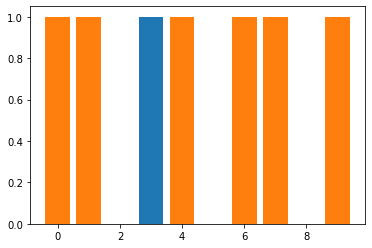

In [27]:
plt.bar(range(10),y_test.head(10))
plt.bar(range(10),predictions[0:10])